<a href="https://colab.research.google.com/github/RSK11547210/saikrishna_INFO5502_spring2022/blob/main/lab_assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The seventh Lab-assignment (03/31/2022, 50 points in total)

The purpose of this exercise is to build several regression models based on real-world datasets. 

### Question 1 (25 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

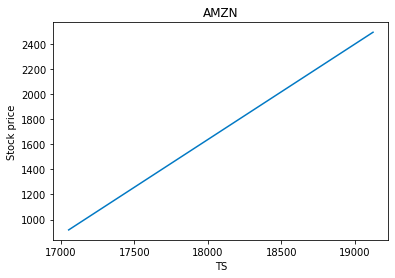

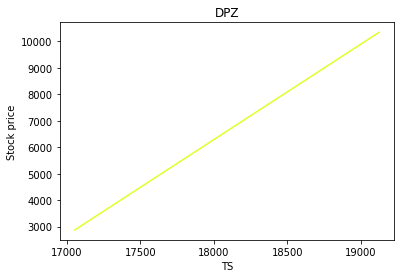

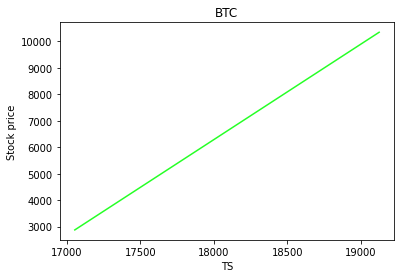

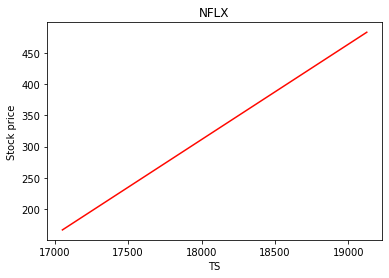



Linear regression model score of AMZN is  0.8711189934169932
Linear regression model score of DPZ is  0.9312098297726329
Linear regression model score of BTC is  0.4807490825794034
Linear regression model score of NFLX is  0.8127761232849322


In [25]:
### You code here

from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression 

data_df=pd.read_csv("/content/portfolio_data.csv")

data_df['TotalDays']=data_df.apply(lambda row: (datetime.strptime(row['Date'],'%m/%d/%Y')-datetime(1970,1,1)).days, axis=1) # generating totalSeconds column to use for regression

testing_df=pd.DataFrame(columns=['Date','TotalDays'])
testing_df['Date']=np.array(pd.date_range(data_df['Date'].max(),datetime.now()))
testing_df['TotalDays']=testing_df.apply(lambda row: (row['Date']-datetime(1970,1,1)).days, axis=1)

#using linear regression
x_train=data_df[['TotalDays']]

amazon_model=LinearRegression()
dominos_model= LinearRegression()
btc_model = LinearRegression()
netflix_model= LinearRegression()

amazon_model.fit(x_train, data_df[['AMZN']])
dominos_model.fit(x_train,data_df[['DPZ']])
btc_model.fit(x_train,data_df[['BTC']])
netflix_model.fit(x_train,data_df[['NFLX']])

x_test=testing_df[['TotalDays']]

#Plot 1
amzn_pred=amazon_model.predict(x_test)
#plt.subplot(2,2,1)
plt.xlabel('TS')
plt.ylabel('Stock price')
plt.title('AMZN')
plt.plot(x_test,amzn_pred,color="#0279c4")
plt.show()
print("\n")

#Plot 2
dpz_pred=btc_model.predict(x_test)
plt.xlabel('TS')
plt.ylabel('Stock price')
plt.title('DPZ')
plt.plot(x_test,dpz_pred,color="#e1ff26")
plt.show()
print("\n")

#Plot 3
btc_pred=btc_model.predict(x_test)
plt.xlabel('TS')
plt.ylabel('Stock price')
plt.title('BTC')
plt.plot(x_test,btc_pred,color="#26ff26")
plt.show()
print("\n")

#Plot 4
netflix_pred=netflix_model.predict(x_test)
plt.xlabel('TS')
plt.ylabel('Stock price')
plt.title('NFLX')
plt.plot(x_test,netflix_pred,color="#ff0800")
plt.show()
print("\n")

#scores
print('Linear regression model score of AMZN is ',amazon_model.score(x_train, data_df[['AMZN']]))
print('Linear regression model score of DPZ is ', dominos_model.score(x_train,data_df[['DPZ']]))
print('Linear regression model score of BTC is ',btc_model.score(x_train,data_df[['BTC']]))
print('Linear regression model score of NFLX is ',netflix_model.score(x_train,data_df[['NFLX']]))

### Question 2 (25 points) The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset. The dataset can be downloaded here: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/Twitter%20Sentiment%20Analysis. Please build a logistic regression model for the classification, evaluation metrics include accuracy, precision, recall, and F-1 score need to be reported. 

In [33]:
### You code here:


import pandas as pd
import re
import nltk
import string
import re
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support


nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

stop_words=stopwords.words('english')

def process_tweet(tweet):
  rslt=str(tweet).lower()
  rslt=re.sub(r'@user','',rslt) #removing repetitive '@user' from tweets
  rslt = re.sub('\[.*?\]', '', rslt)
  rslt = re.sub('https?://\S+|www\.\S+', '', rslt)
  rslt = re.sub('<.*?>+#', '', rslt)
  rslt = re.sub('[%s]' % re.escape(string.punctuation), '', rslt)
  rslt = re.sub('\n', '', rslt)
  rslt = re.sub('\w*\d\w*', '', rslt)
  tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
  rslt= tokenizer.tokenize(rslt) #tokenizes tweet into words
  rslt = [word for word in rslt if word not in stop_words]
  rslt = [stemmer.stem(word) for word in rslt] 
  
  return rslt

#Train
training_df=pd.read_csv('/content/sample_data/train.csv/train.csv')

training_df.describe()
training_df['tweet']=training_df['tweet'].apply(process_tweet)

processed_train = np.append(np.ones((len(training_df[training_df['label'] == 1]), 1)), np.zeros((len(training_df[training_df['label']==0]), 1)), axis=0)

model= LogisticRegression()
model.fit(processed_train,training_df[['label']])

#Test
testing_df=pd.read_csv('/content/sample_data/test.csv/test.csv')

testing_df[['tweet']]=testing_df[['tweet']].apply(process_tweet)
processed_test = np.ones((len(testing_df), 1))

y_predict=model.predict(processed_test)

print("========================================================================================================================================")
print('Accuracy is ', model.score(processed_train,training_df[['label']]))
print('Precision,recall, f-1 score is ',precision_recall_fscore_support(training_df[['label']],model.predict(processed_train)))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Accuracy is  0.9298542018647143
Precision,recall, f-1 score is  (array([0.9298542, 0.       ]), array([1., 0.]), array([0.96365228, 0.        ]), array([29720,  2242]))
